# Imports

In [204]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd

# library to create visualizations
import seaborn as sns

# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.pyplot import figure

import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates

from pandas.api.types import CategoricalDtype




# Load Dataframe

In [187]:
#read dataframe
DataFrame = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/unexploded_dataframe_11_04_22.csv") 
#set correact_datatypes for dataframe
DataFrame = set_correct_datatypes(DataFrame)
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91148 entries, 0 to 91147
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Titel                  91148 non-null  object        
 1   Date_Info              91148 non-null  datetime64[ns]
 2   URL                    91148 non-null  object        
 3   Overline               71332 non-null  object        
 4   Breadcrumb             50182 non-null  object        
 5   author                 13980 non-null  object        
 6   detailed_informations  19823 non-null  object        
 7   Zugriff_Datum          73429 non-null  datetime64[ns]
 8   News_page              91148 non-null  object        
 9   Kategorie              91144 non-null  object        
 10  tokenized_titles       91148 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 7.6+ MB


In [14]:
DataFrame.head()

,Titel,Date_Info,URL,Overline,Breadcrumb,author,detailed_informations,Zugriff_Datum,News_page,Kategorie,tokenized_titles
0,Gasspeicher wenig gefüllt: Ist die Versorgung ...,2022-01-21 09:00:00,https://www.sueddeutsche.de/wirtschaft/gas-gas...,Gas,dpa,NaN,NaN,1970-01-01 00:00:00.021012022,Sueddeutsche,wirtschaft,"['Gasspeicher', 'wenig', 'gefüllt', ':', 'Ist'..."
1,Mann auf Autobahnparkplatz mutmaßlich erstochen,2022-01-21 09:00:00,https://www.sueddeutsche.de/panorama/kriminali...,Kriminalität - Hoort,dpa,NaN,NaN,1970-01-01 00:00:00.021012022,Sueddeutsche,panorama,"['Mann', 'Autobahnparkplatz', 'mutmaßlich', 'e..."
2,Sag beim Abstieg leise Service,2022-01-21 09:00:00,https://www.sueddeutsche.de/panorama/mitten-in...,"SZ-Kolumne ""Mitten in ...""",NaN,"Von Thomas Balbierer, Max Fluder und Karin Janker",Wenn ein dänischer Tourist in den bayerischen ...,1970-01-01 00:00:00.021012022,Sueddeutsche,panorama,"['Sag', 'beim', 'Abstieg', 'leise', 'Service']"
3,Ein Imam unter Verdacht,2022-01-21 08:58:00,https://www.sueddeutsche.de/politik/belgien-mo...,Molenbeek,NaN,"Von Josef Kelnberger, Brüssel",Belgien entzieht einem der bekanntesten muslim...,1970-01-01 00:00:00.021012022,Sueddeutsche,politik,"['Ein', 'Imam', 'Verdacht']"
4,Schnee und Eis: Mehrere Unfälle wegen glatter ...,2022-01-21 08:58:00,https://www.sueddeutsche.de/panorama/schnee-un...,NaN,NaN,NaN,Video\n \n ...,1970-01-01 00:00:00.021012022,Sueddeutsche,panorama,"['Schnee', 'Eis', ':', 'Mehrere', 'Unfälle', '..."


# Load exploded dataframe

In [85]:
#read dataframe
exploded_DataFrame = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/exploded_dataframe_11_04_22.csv") 
#set correact_datatypes for dataframe
exploded_DataFrame = set_correct_datatypes(exploded_DataFrame)
exploded_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451752 entries, 0 to 451751
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Titel                  451752 non-null  object        
 1   Date_Info              451752 non-null  datetime64[ns]
 2   URL                    451752 non-null  object        
 3   Overline               316893 non-null  object        
 4   Breadcrumb             249314 non-null  object        
 5   author                 44028 non-null   object        
 6   detailed_informations  66674 non-null   object        
 7   Zugriff_Datum          326822 non-null  datetime64[ns]
 8   News_page              451752 non-null  object        
 9   Kategorie              124930 non-null  object        
 10  tokenized_titles       451737 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 37.9+ MB


## Load occurence dataframe

In [88]:
#read dataframe
correlation_DataFrame = pd.read_csv("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/DataFrames/Combined_Dataframe_11042022.csv") 
#set correact_datatypes for dataframe
correlation_DataFrame = set_correct_datatypes(correlation_DataFrame)
correlation_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110380 entries, 0 to 110379
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   KeyWord                            110380 non-null  object        
 1   date                               110380 non-null  datetime64[ns]
 2   Occurence_in_News                  110380 non-null  int64         
 3   normalized_Occurence_in_News       110380 non-null  float64       
 4   Occurence_in_Google                110380 non-null  int64         
 5   normalized_Occurence_in_Google     110380 non-null  float64       
 6   Occurence_in_Wikipedia             110380 non-null  int64         
 7   normalized_Occurence_in_Wikipedia  110380 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 6.7+ MB


# EDA

In [15]:
DataFrame["Kategorie"].value_counts()[:20]

panorama             15913
sport                14457
bayern & muenchen    13900
politik              12835
wirtschaft            9843
gesundheit            5151
kultur                3824
ausland               3608
Entertainment         3057
wissenschaft          2714
karriere               717
bildung                689
service                661
netzwelt               527
medien                 389
projekte               290
kolumne                257
mobilität              248
reise                  234
geschichte             187
Name: Kategorie, dtype: int64

# Plot sizes

In [16]:
# define size
sns.set(rc={'figure.figsize':(40,20)})

# Functions for analysis

## Find most frequent keyword in time period

In [133]:
def find_most_frequent_keyWord_in_period(dataframe, start_date,end_date):
    frequent_keyword_df = dataframe.copy()
    # 1. dataframe auf datum begrenzen 
    date_mask = (frequent_keyword_df['Date_Info'] > start_date) & (frequent_keyword_df['Date_Info'] <= end_date)
    frequent_keyword_df = frequent_keyword_df.loc[date_mask]
    # 2. value_counts  
    print(frequent_keyword_df["tokenized_titles"].value_counts()[:20])
    
    
    
start_date ="2022-03-08"
end_date =  "2022-03-15"
find_most_frequent_keyWord_in_period(exploded_DataFrame, start_date, end_date)

Ukraine            223
Krieg              146
Russland           127
mehr               114
wegen               81
Mann                73
verletzt            73
Putin               71
steigt              62
Mehr                58
Polizei             57
Euro                55
Berlin              54
fordert             53
Corona              53
Deutschland         50
Flüchtlinge         50
zurück              46
Corona-Inzidenz     46
ab                  45
Name: tokenized_titles, dtype: int64


## Find most frequent keyword @ specific date

In [186]:
def find_most_frequent_keyWord_in_period(dataframe, date):
    frequent_keyword_df = dataframe.copy()
    frequent_keyword_df["Date"] = frequent_keyword_df["Date_Info"].dt.date
    # date column to string
    frequent_keyword_df['Date'] = frequent_keyword_df['Date'].astype(str)

    # 1. dataframe auf datum begrenzen 
    frequent_keyword_df = frequent_keyword_df.loc[frequent_keyword_df['Date'] == date]

    # 2. value_counts  
    print(frequent_keyword_df['tokenized_titles'].value_counts()[:20])
 
date = "2022-03-05"
x = find_most_frequent_keyWord_in_period(exploded_DataFrame, date)



Ukraine            36
Russland           28
Krieg              23
Putin              15
Ukraine-Krieg      11
Mariupol           11
Schalke            11
Berlin             10
Rostock             9
gewinnt             9
verletzt            9
Menschen            8
Deutschland         8
Sieg                7
geht                7
Hertha              7
St.                 7
Flüchtlinge         7
Nach                7
Corona-Inzidenz     7
Name: tokenized_titles, dtype: int64


## Find most trending keyword in time period

In [208]:
def find_most_trending_keyWord_in_period(dataframe, start_date, end_date):
    trending_keyword_df = dataframe.copy()
    # 1. dataframe auf datum begrenzen 
    date_mask = (trending_keyword_df['date'] > start_date) & (trending_keyword_df['date'] <= end_date)
    trending_keyword_df = trending_keyword_df.loc[date_mask]
    print(trending_keyword_df["Occurence_in_News"].value_counts()[:20])

start_date ="2022-03-08"
end_date =  "2022-03-15"
find_most_trending_keyWord_in_period(correlation_DataFrame, start_date, end_date)

0     2433
1     1231
2      610
3      293
4      190
5       86
6       58
7       33
8       29
11      16
9       12
10      11
13       5
24       4
18       3
12       3
16       2
22       2
14       1
26       1
Name: Occurence_in_News, dtype: int64


# Ammount of published news over time - OVERALL

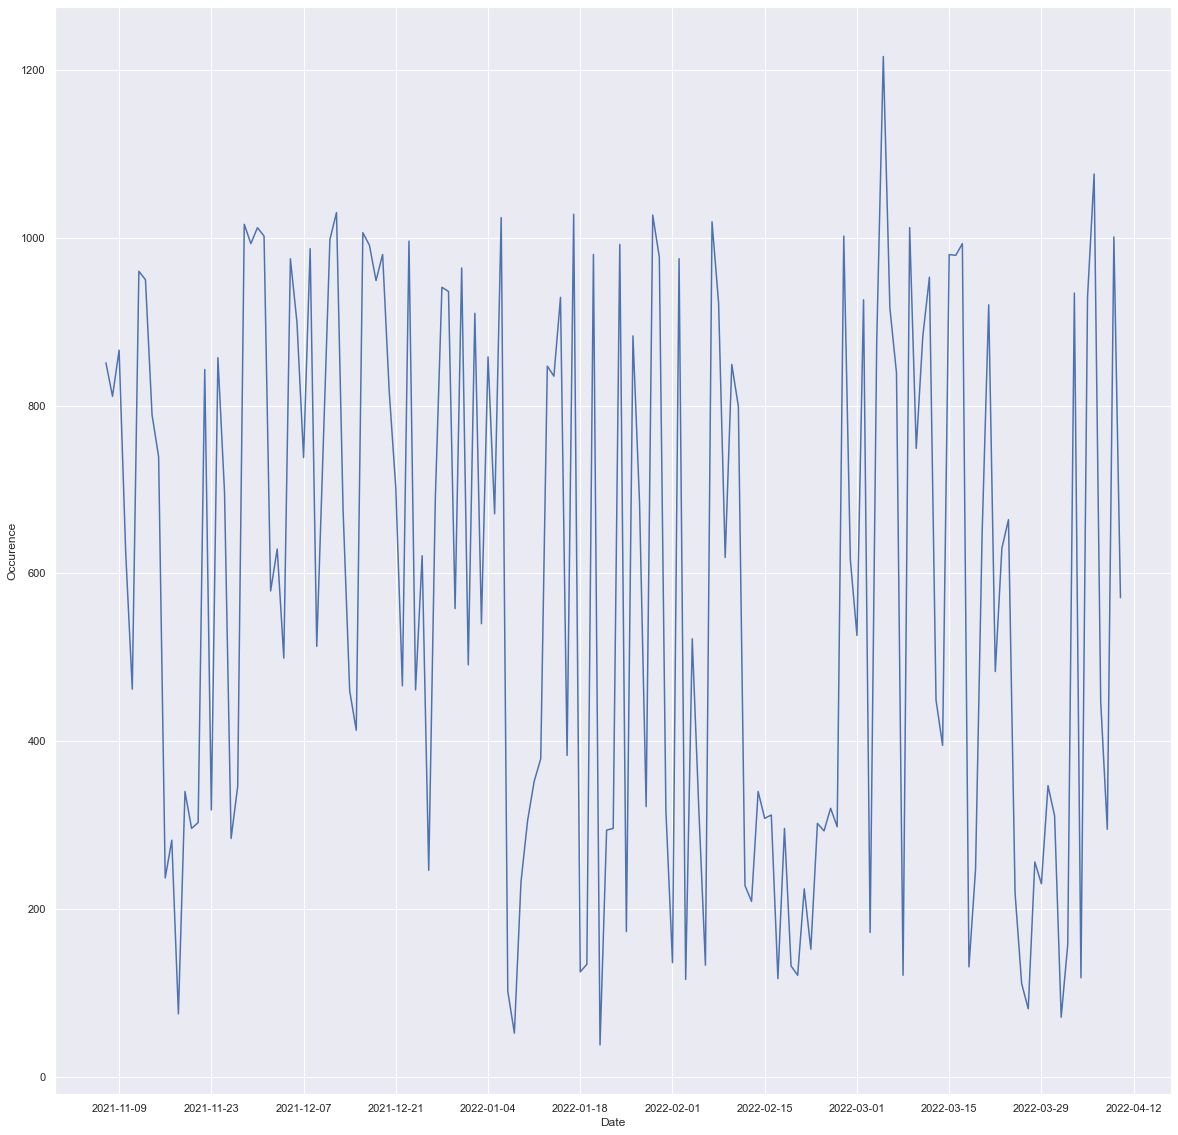

In [209]:
dataframe = DataFrame.copy()

dataframe["Date"] = dataframe['Date_Info'].dt.date

a=dataframe.groupby("Date").size().values
dataframe= dataframe.drop_duplicates(subset="Date").assign(Count=a)

# smoothen
#dataframe["Count"] = dataframe["Count"].rolling(7).sum()

ax = sns.lineplot(x="Date", y="Count", data=dataframe,ci=None)
ax.set(xlabel='Date', ylabel='Occurence')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.show()

dataframe = dataframe.sort_values("Count", ascending=False)


# Ammount of published news over time - Spiegel

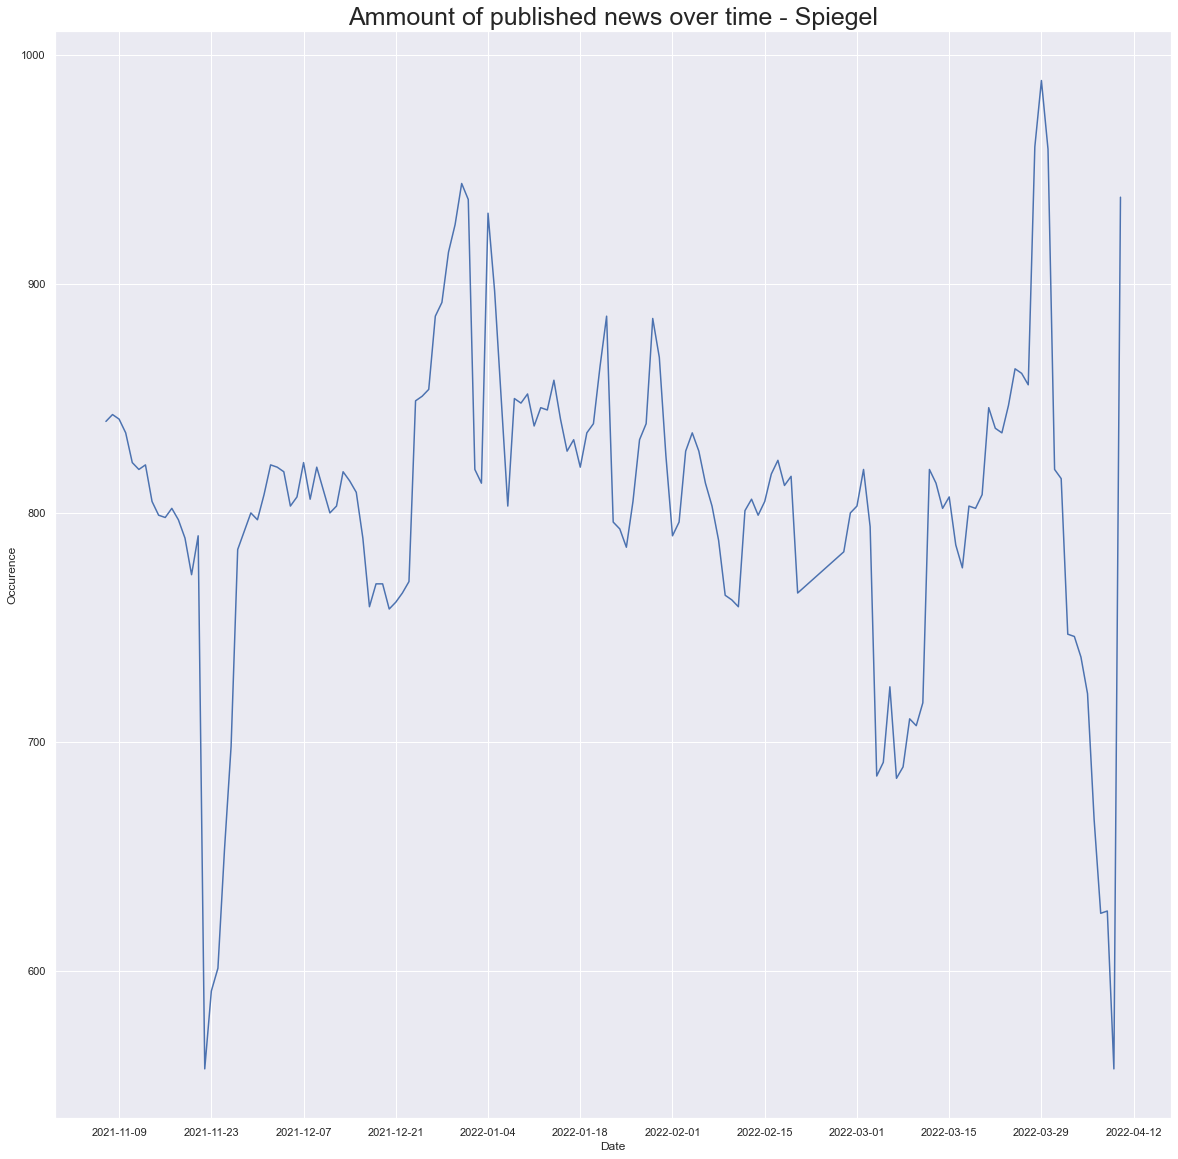

In [223]:
dataframe = DataFrame.copy()

dataframe = dataframe.loc[dataframe["News_page"] == "Spiegel"]

dataframe["Date"] = dataframe['Date_Info'].dt.date

a=dataframe.groupby("Date").size().values
dataframe= dataframe.drop_duplicates(subset="Date").assign(Count=a)

# smoothen
dataframe["Count"] = dataframe["Count"].rolling(7).sum()

ax = sns.lineplot(x="Date", y="Count", data=dataframe,ci=None)
ax.set(xlabel='Date', ylabel='Occurence')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.title(label = "Ammount of published news over time - Spiegel",
         fontsize = 25)

plt.show()

dataframe = dataframe.sort_values("Count", ascending=False)


# Ammount of published news over time - Sueddeutsche

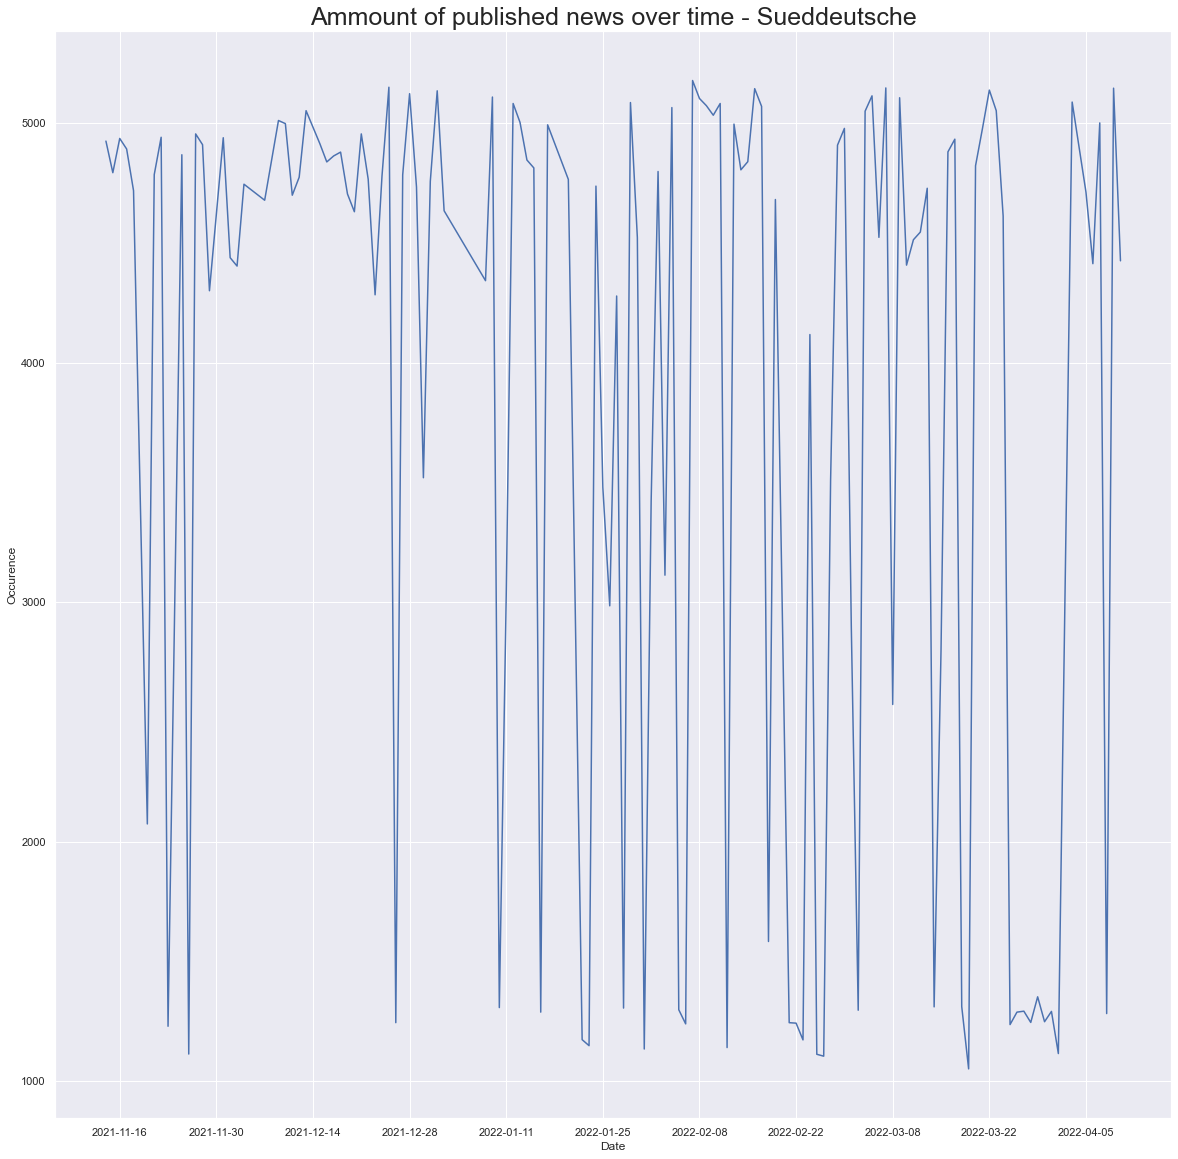

In [224]:
dataframe = DataFrame.copy()

dataframe = dataframe.loc[dataframe["News_page"] == "Sueddeutsche"]

dataframe["Date"] = dataframe['Date_Info'].dt.date

a=dataframe.groupby("Date").size().values
dataframe= dataframe.drop_duplicates(subset="Date").assign(Count=a)

# smoothen
dataframe["Count"] = dataframe["Count"].rolling(7).sum()

ax = sns.lineplot(x="Date", y="Count", data=dataframe,ci=None)
ax.set(xlabel='Date', ylabel='Occurence')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.title(label = "Ammount of published news over time - Sueddeutsche",
         fontsize = 25)

plt.show()

dataframe = dataframe.sort_values("Count", ascending=False)


## total ammount of published news by day

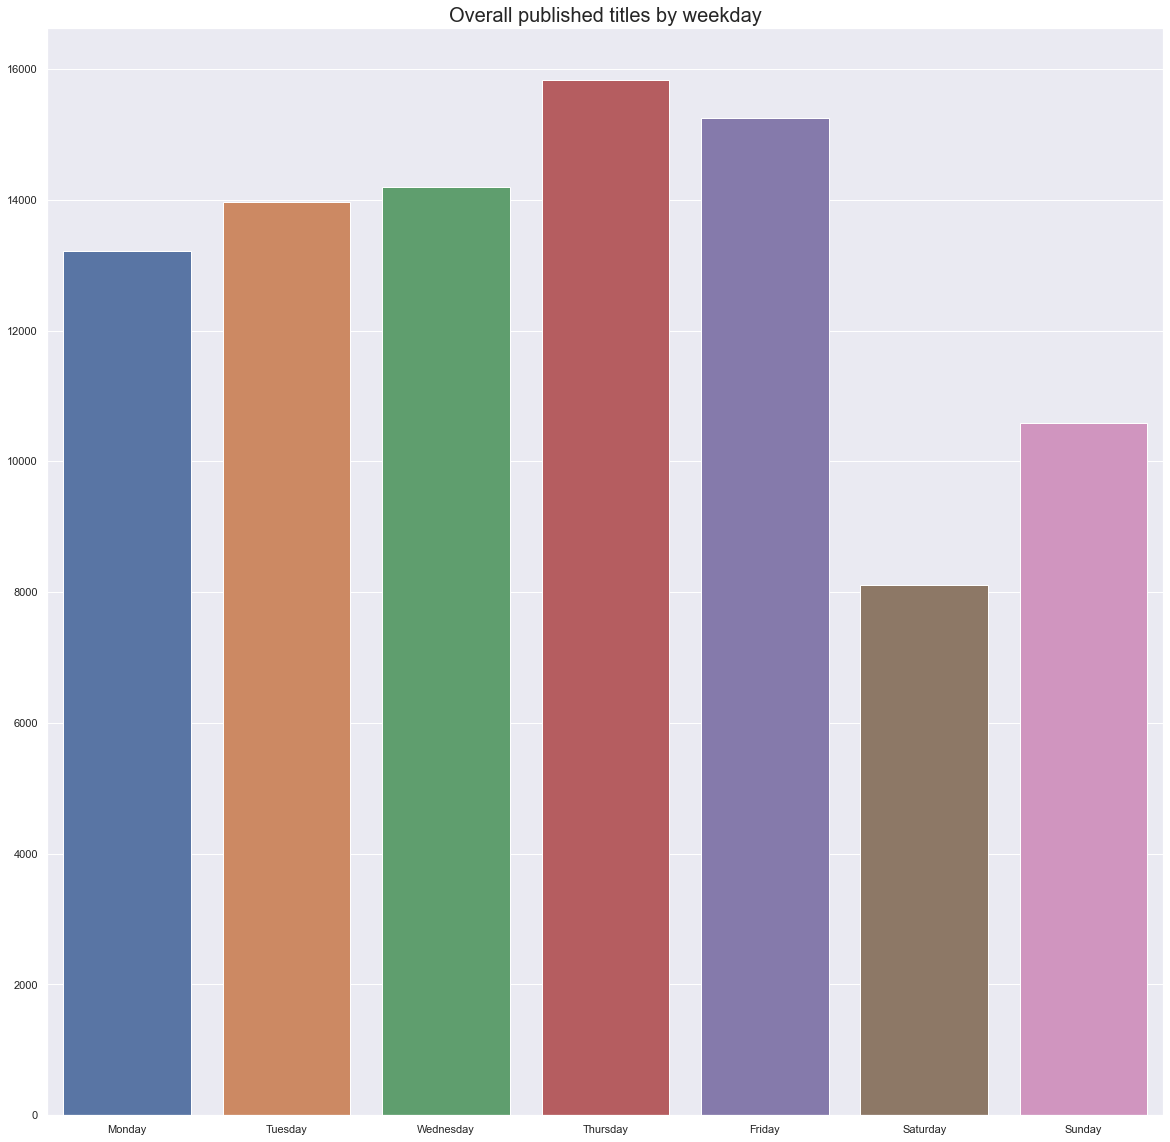

In [207]:
unexploded_DF =  DataFrame.copy()
unexploded_DF["weekday_name"] = unexploded_DF['Date_Info'].dt.day_name()

day_size_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", "Sunday"], 
    ordered=True
)
unexploded_DF['weekday_name'] = unexploded_DF['weekday_name'].astype(day_size_order)

weekday_count = unexploded_DF["weekday_name"].value_counts().sort_values()

values = weekday_count.values
keys = weekday_count.keys()

plt.title("Overall published titles by weekday",fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)

plt.savefig("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/Overall_published_titles_by_weekday.png")


In [ ]:
unexploded_DF =  DataFrame.copy()
unexploded_DF["weekday_name"] = unexploded_DF['Date_Info'].dt.day_name()

day_size_order = CategoricalDtype(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday", "Sunday"], 
    ordered=True
)
unexploded_DF['weekday_name'] = unexploded_DF['weekday_name'].astype(day_size_order)

# Categorie over time - Line Graph 

## Plot single category

In [ ]:
plot =plot_categorie_over_time(DataFrame, "karriere", False,False)

## Plot multiple categories

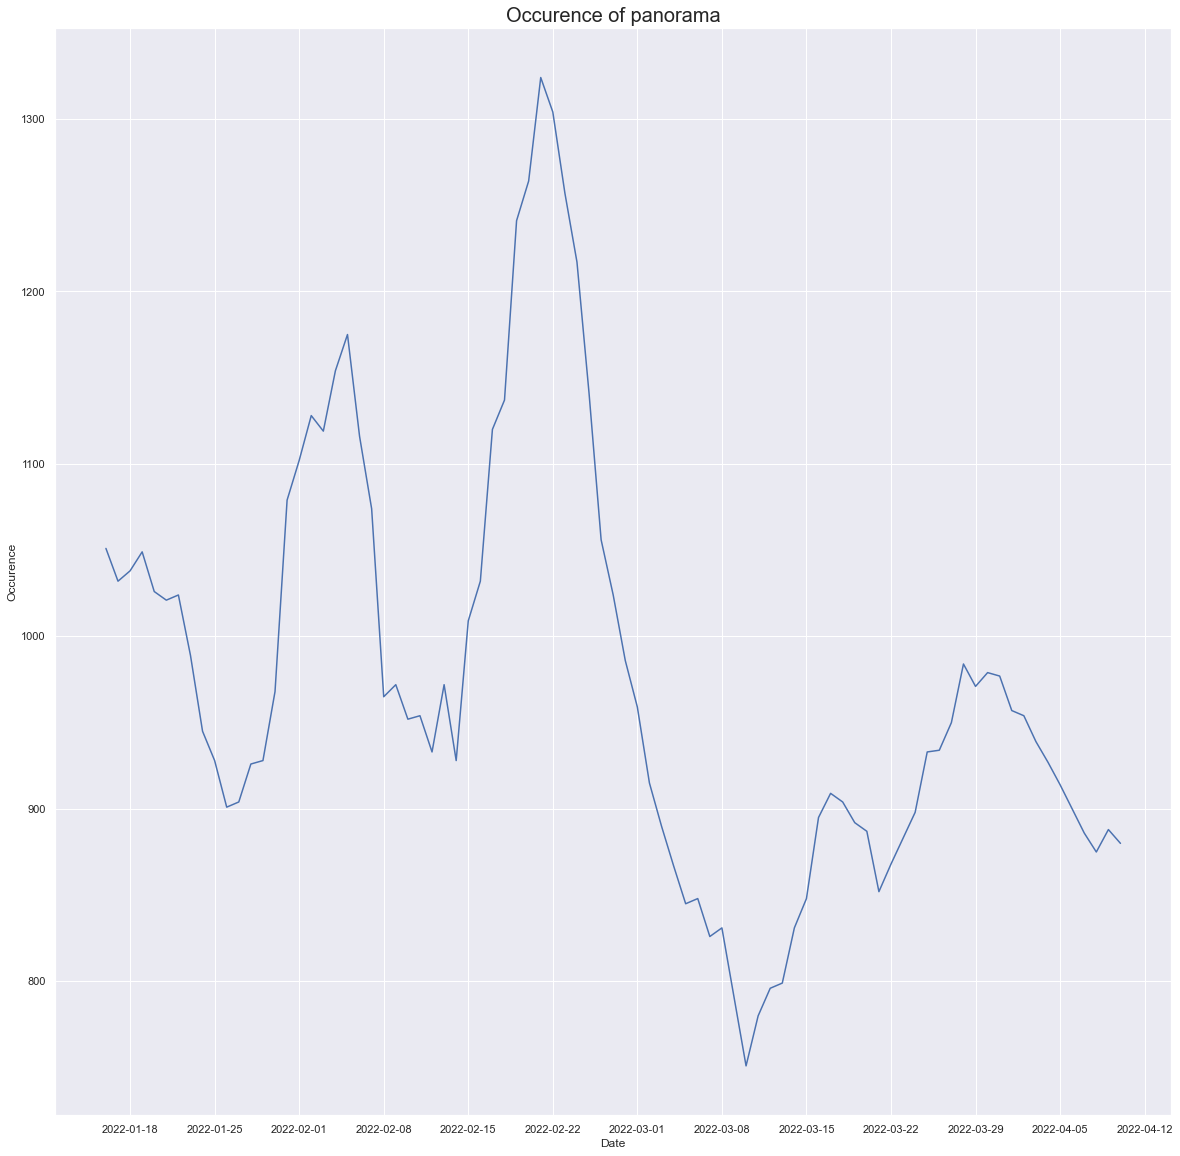

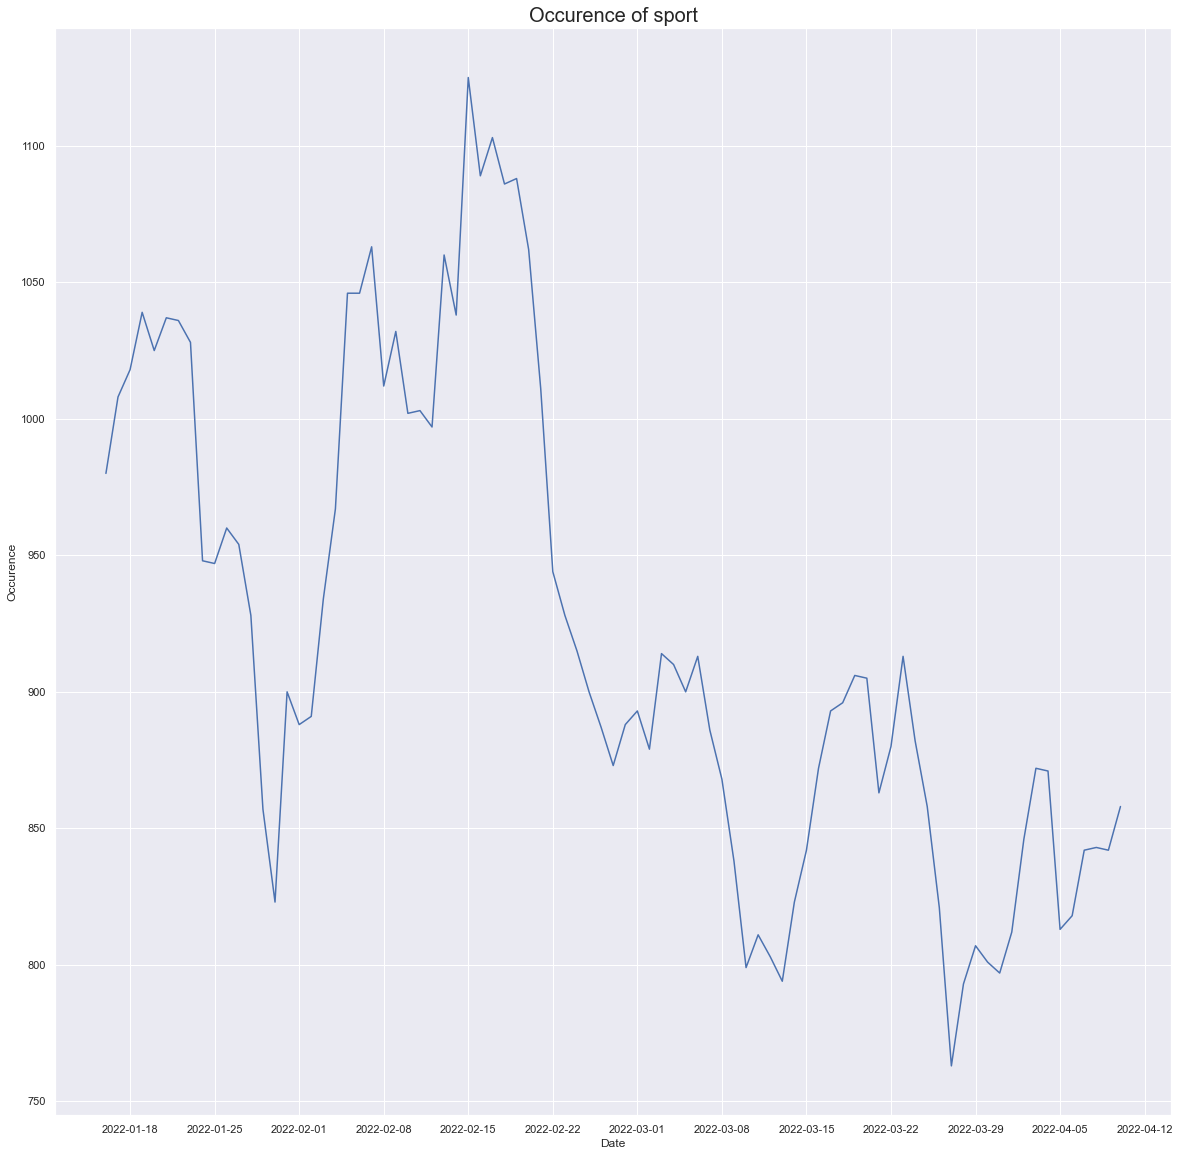

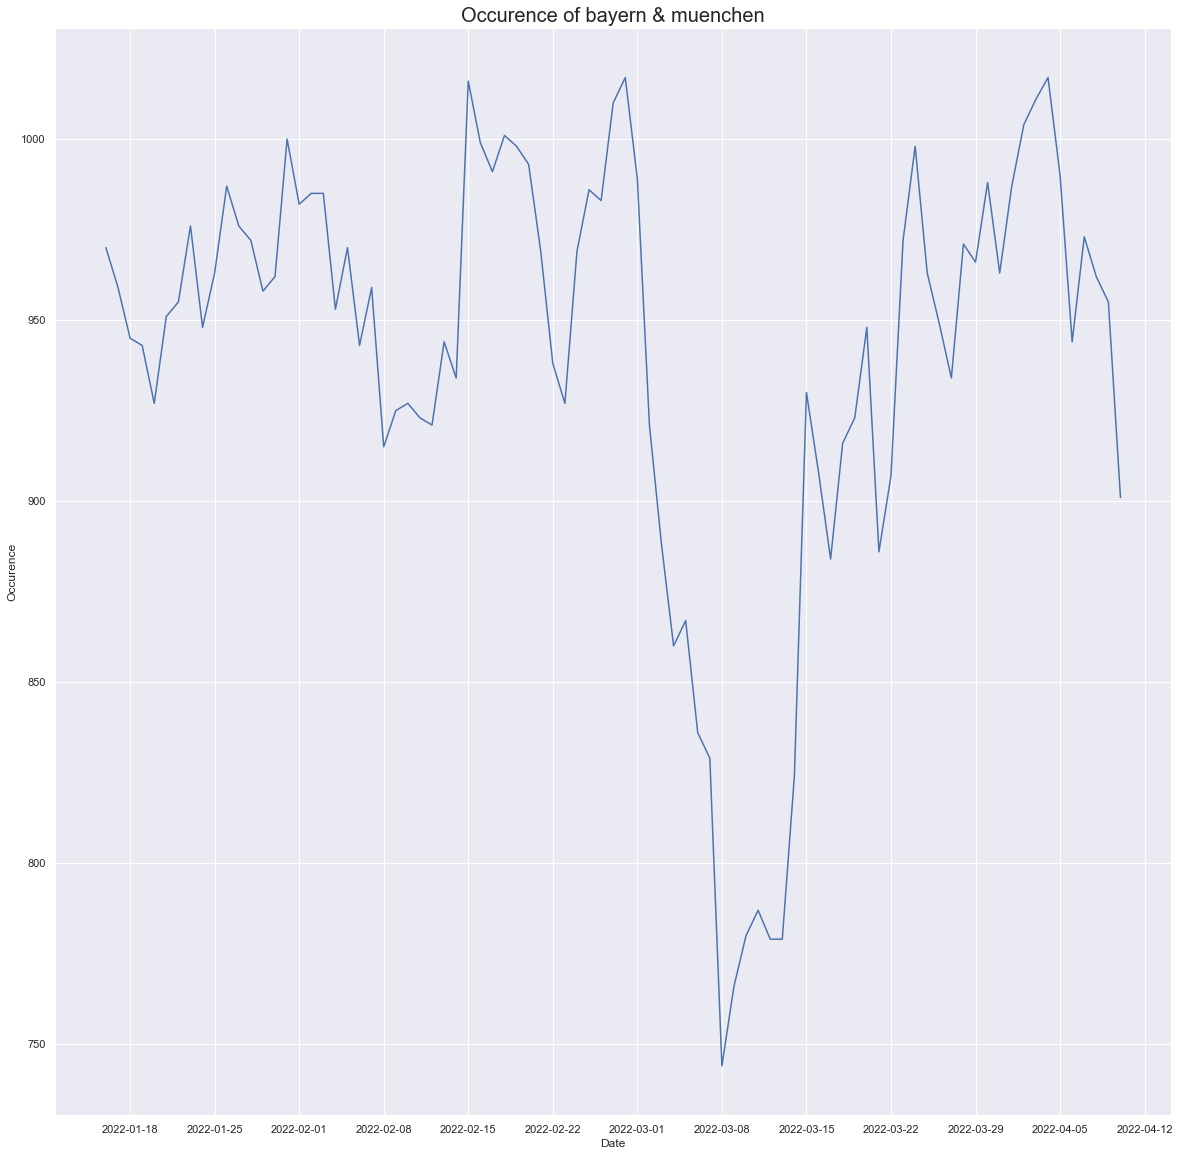

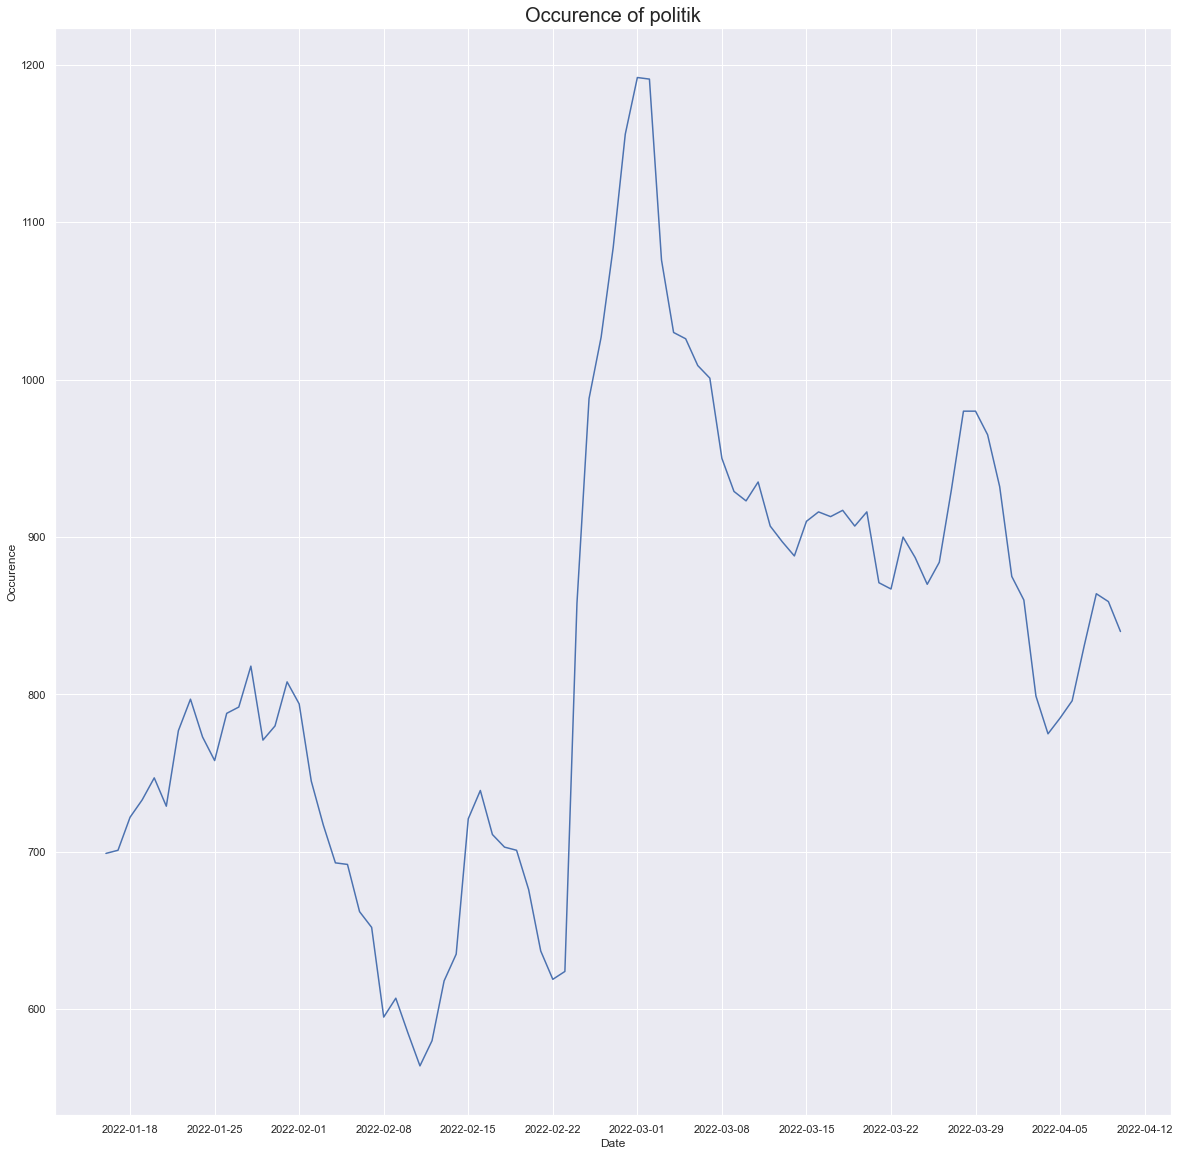

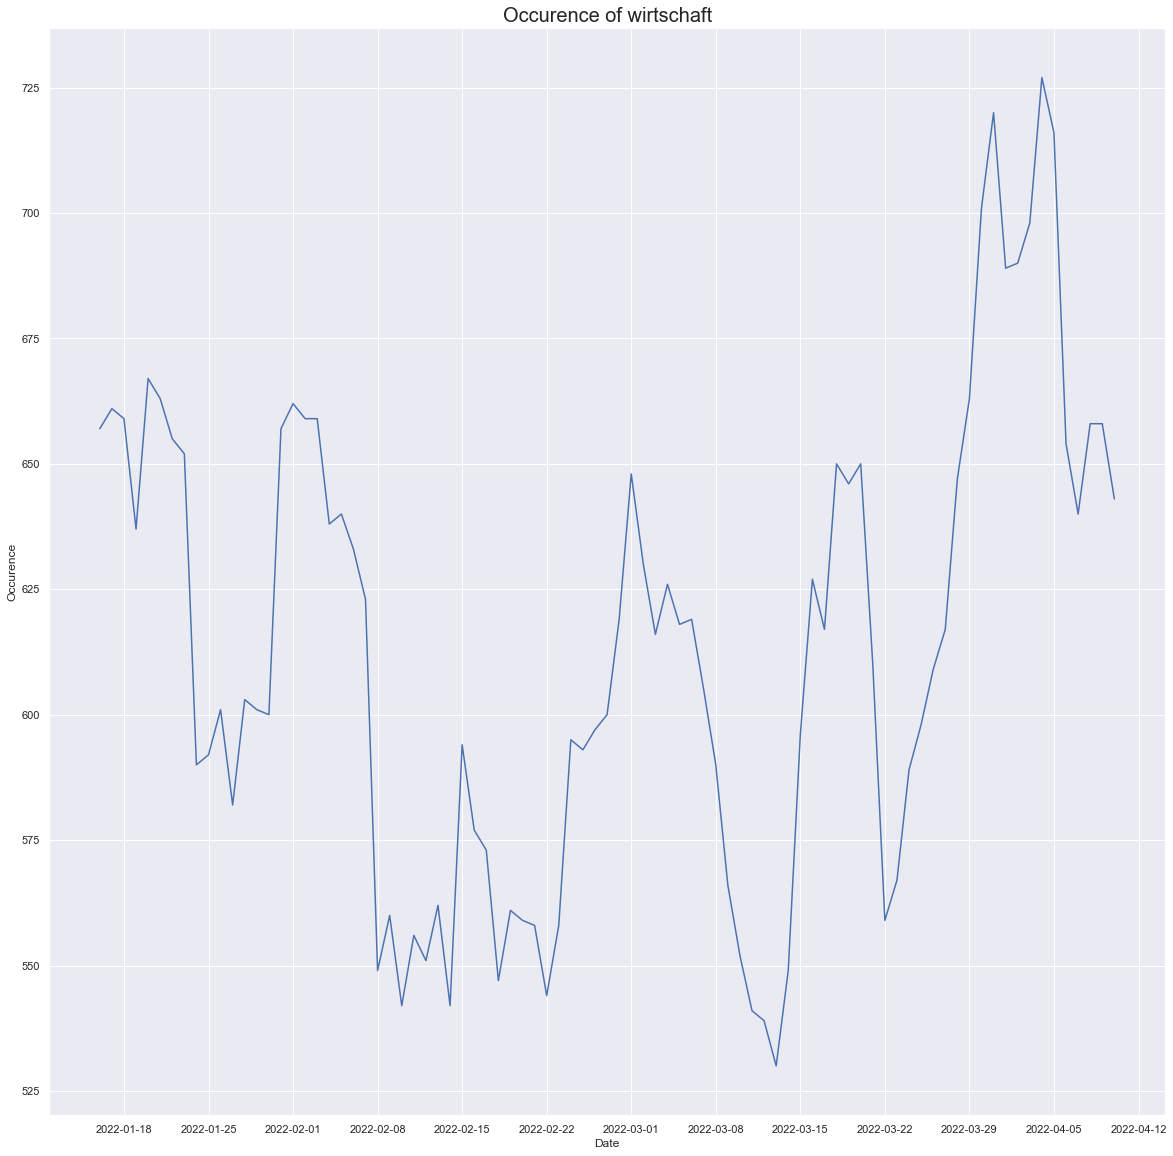

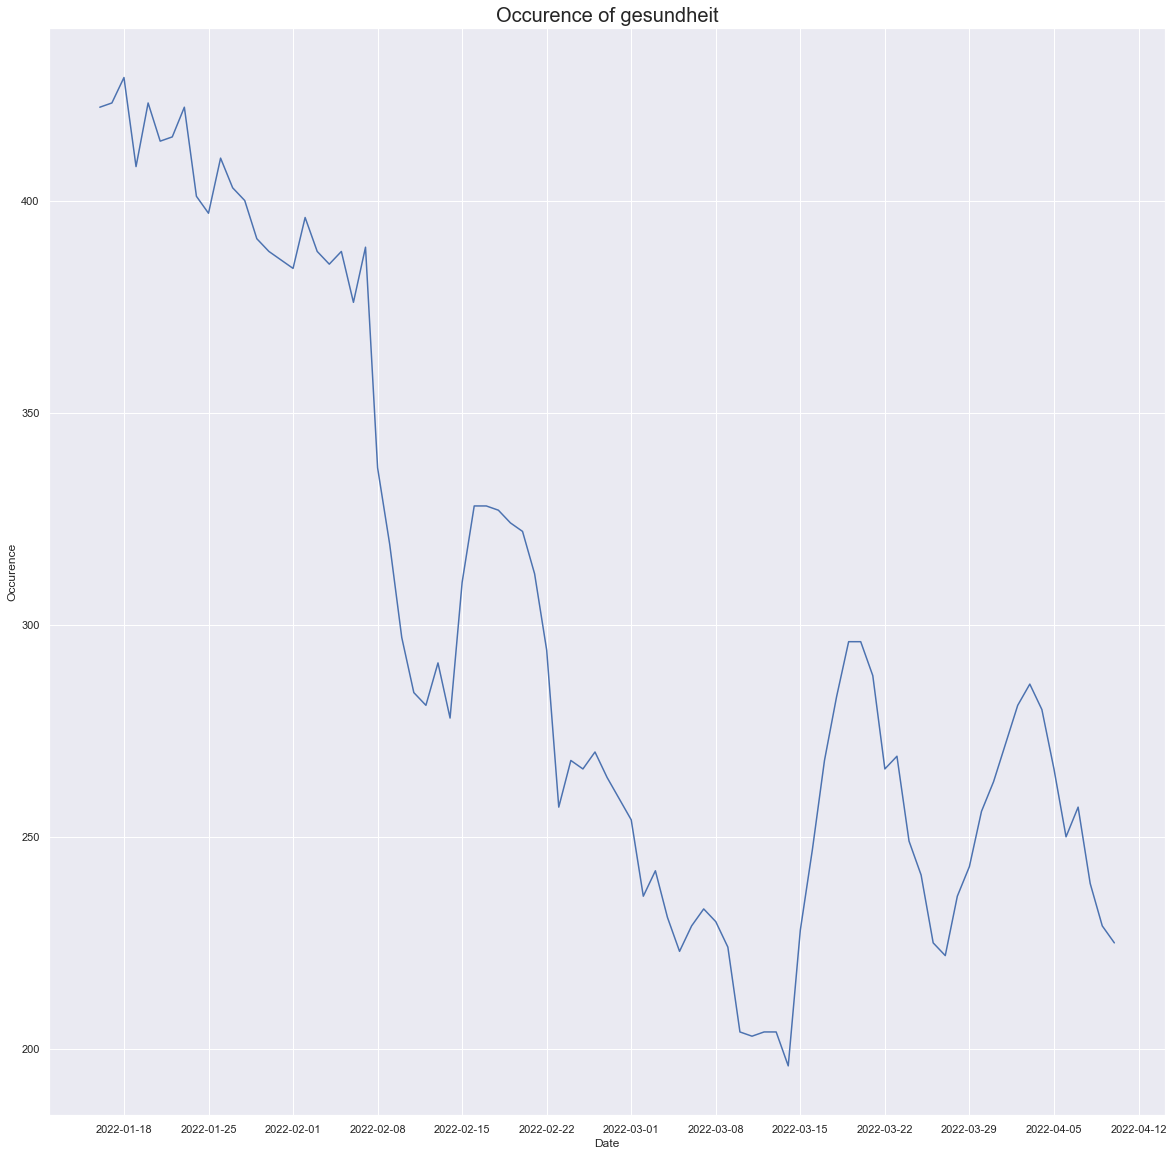

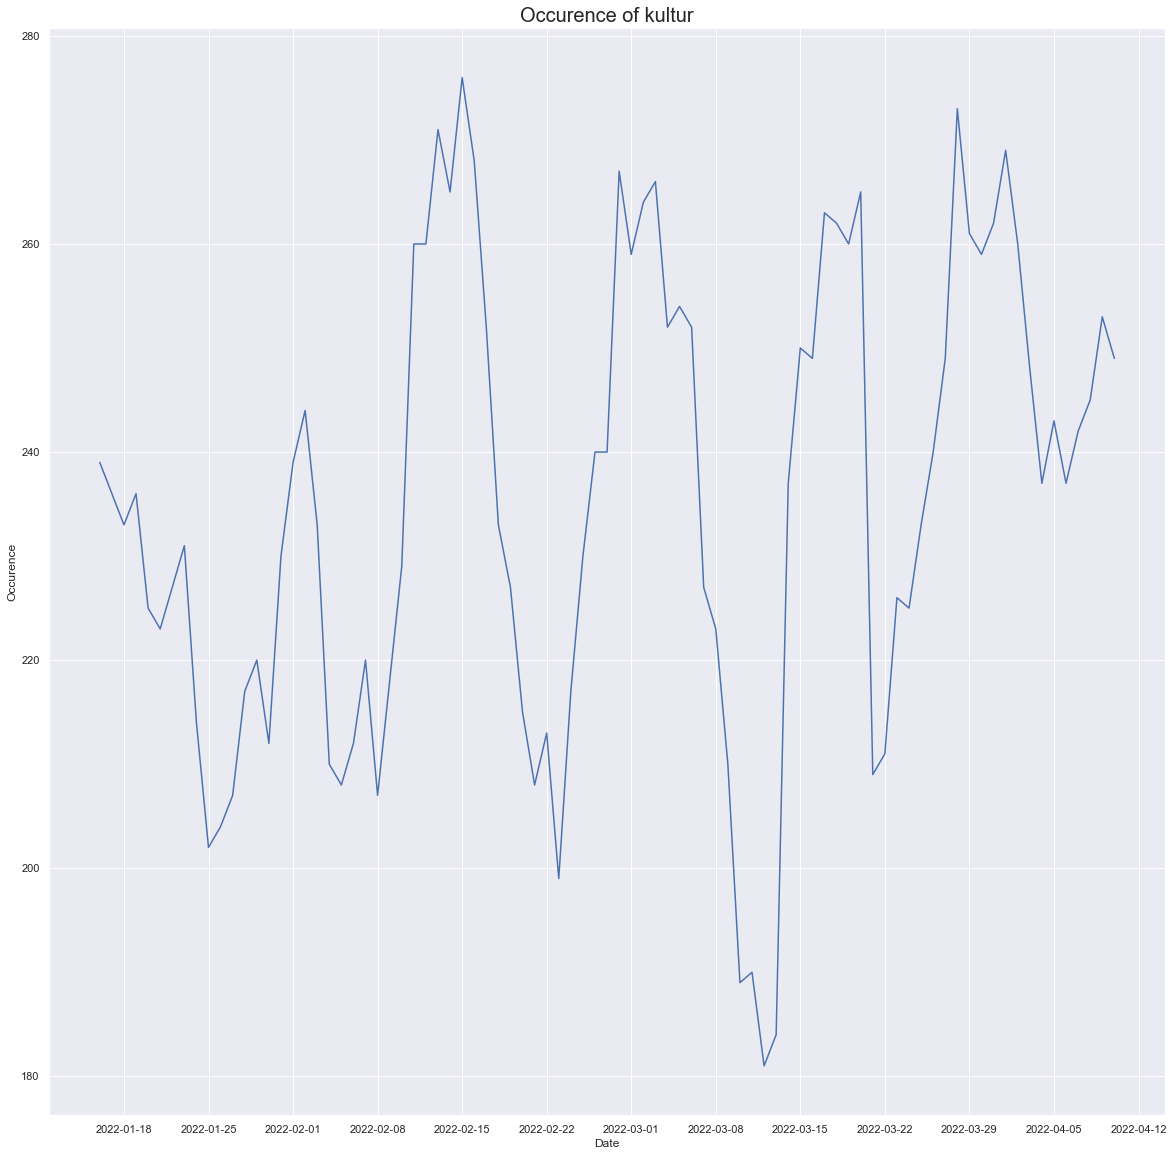

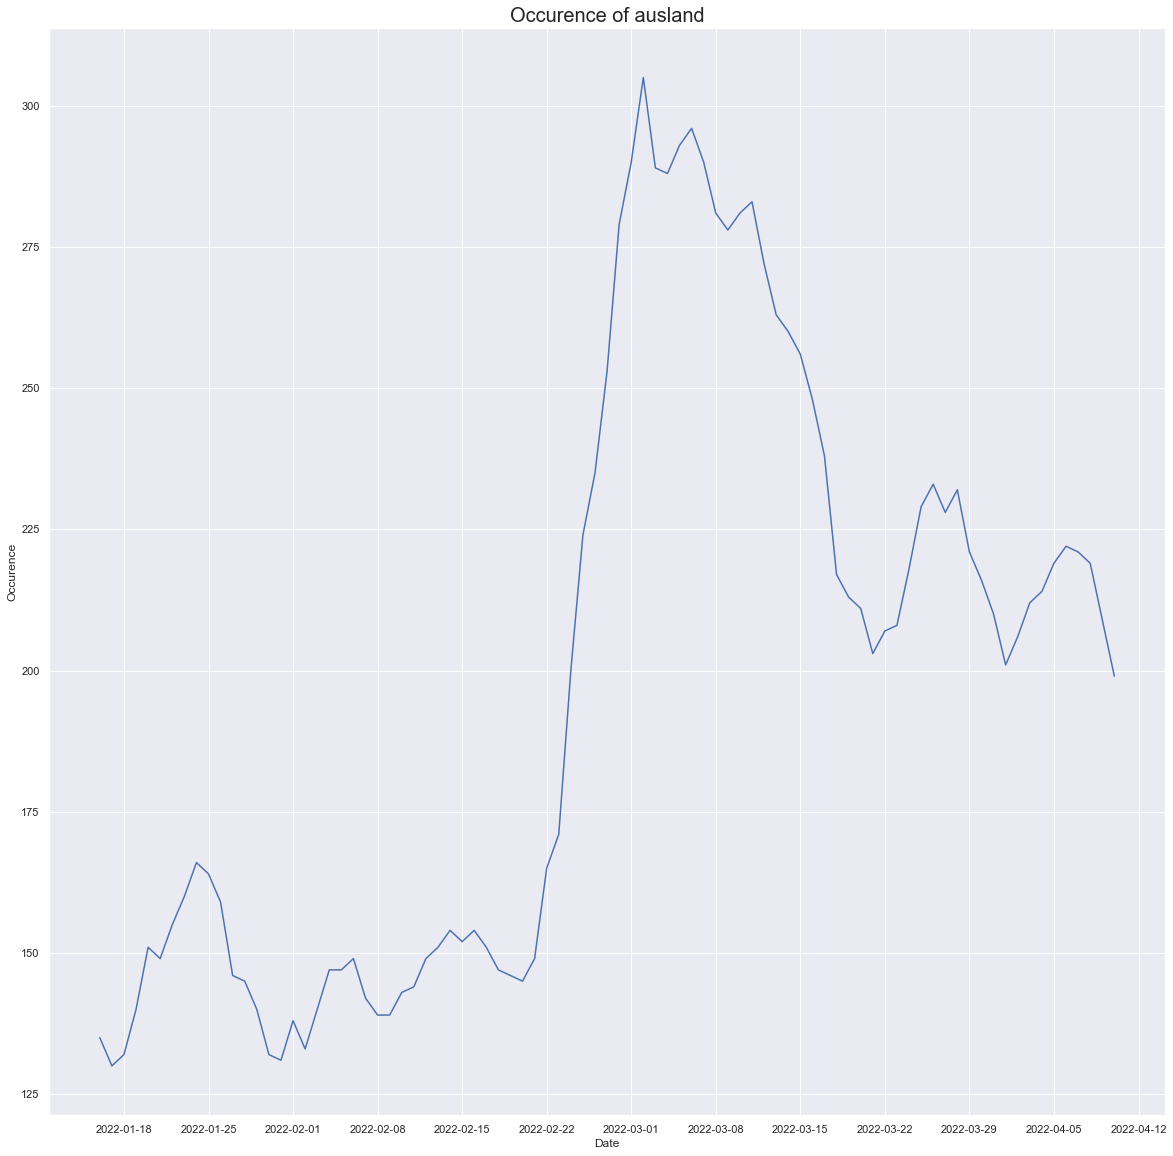

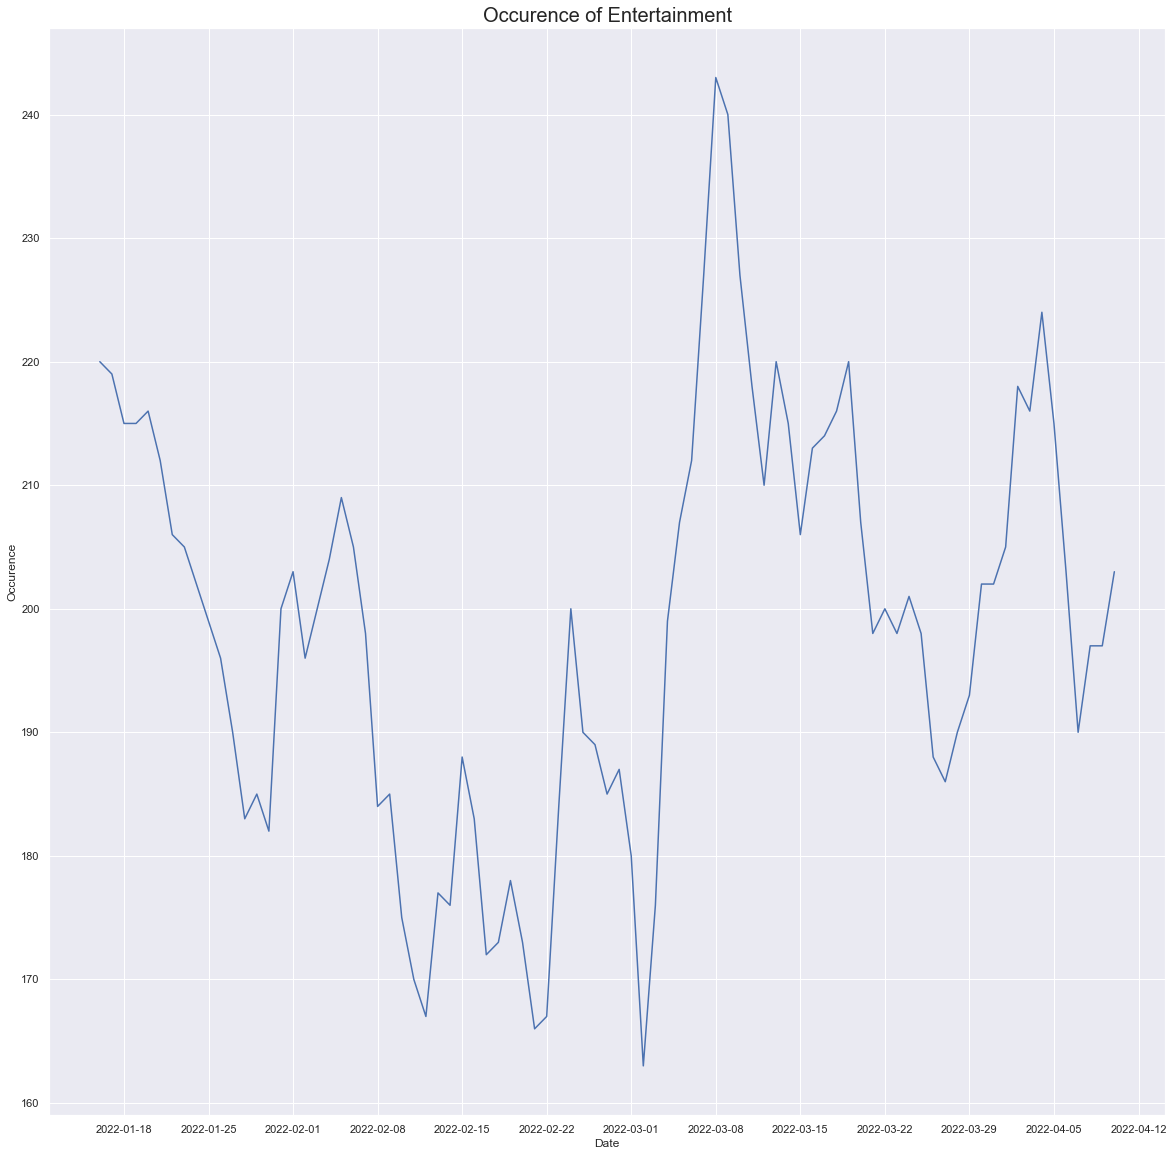

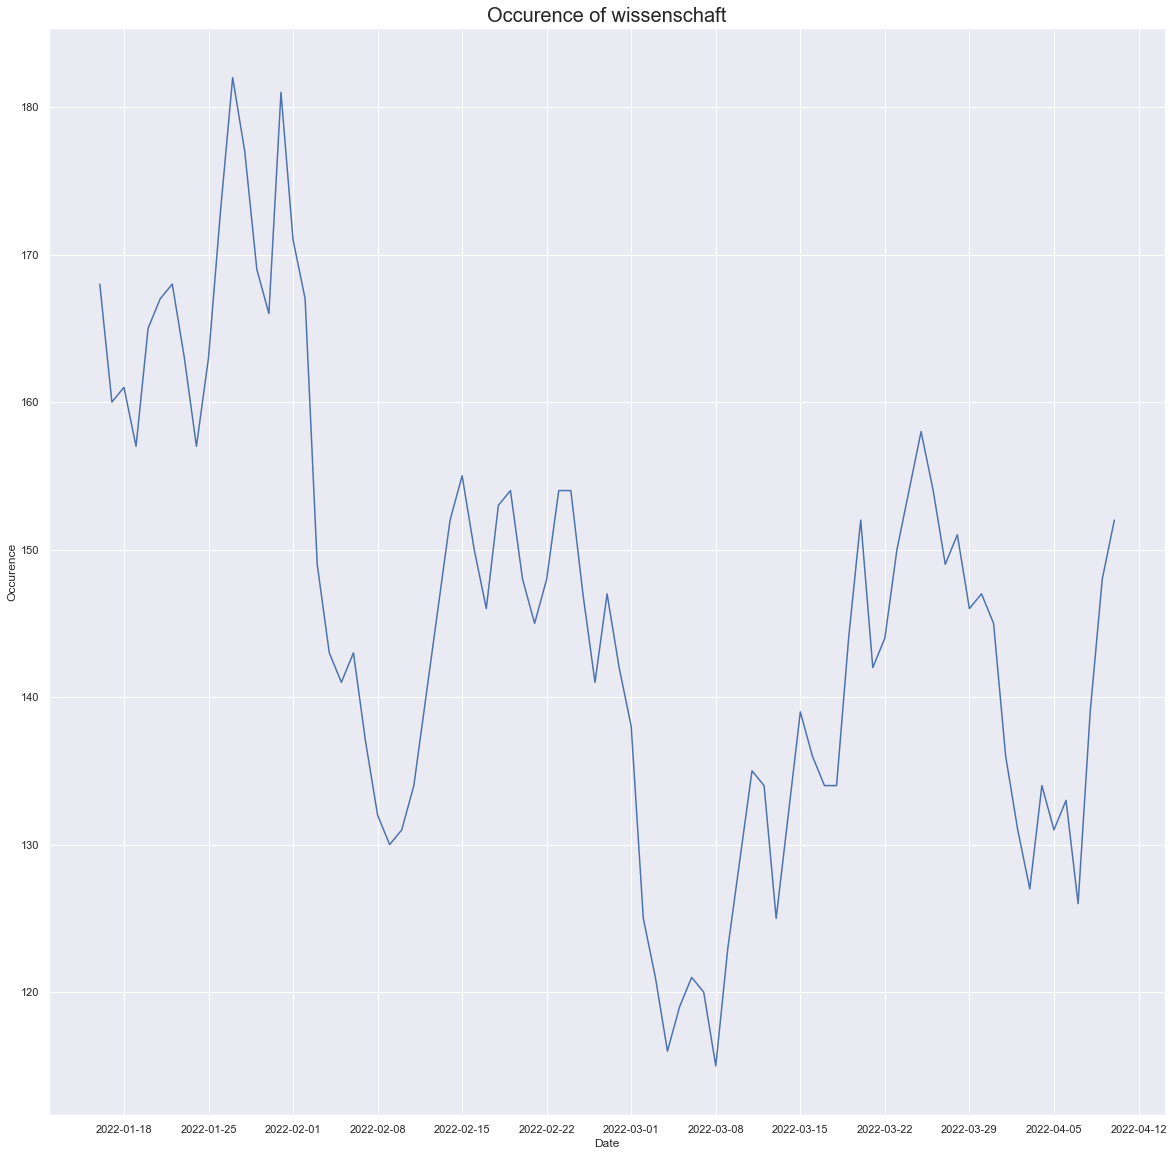

In [222]:
top_n_categories = DataFrame["Kategorie"].value_counts()[:10].index

for category in top_n_categories:
    plot =plot_categorie_over_time(DataFrame, category, True,False)

In [221]:
def plot_categorie_over_time(dataframe, Kategorie, save, vollständig):
    
    font_dict = {
        'size': 20,
        }
    
    DataFrame = dataframe[["Date_Info", "Kategorie"]]
    DataFrame = DataFrame.loc[DataFrame["Kategorie"] == Kategorie]
    
    DataFrame = DataFrame.pivot_table(index='Date_Info', columns='Kategorie', aggfunc='size') \
            .rename_axis(None, axis=1)
    DataFrame = DataFrame.rename(columns={Kategorie: f"Occurence of {Kategorie}"})
      
    filename_vollständig = "unvollständig"
    if vollständig is False:
        DataFrame = DataFrame['2022-01-10' : pd.to_datetime('today').normalize()]
        filename_vollständig = "vollständig"
        
    
    single_category = DataFrame.reset_index()
    single_category["Date_Info"] = single_category['Date_Info'].dt.date



    Column_name =f"Occurence of {Kategorie}"
    
    # Über datum summieren
    single_category = single_category.groupby(by=[single_category["Date_Info"]]).sum()

    single_category[Column_name] = single_category[Column_name].rolling(7).sum()


        
    
    
    ax = sns.lineplot(x="Date_Info", y=Column_name, data=single_category,ci=None)
    ax.set(xlabel='Date', ylabel='Occurence')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

    plt.title(Column_name, fontdict=font_dict)
    if save is True:
        plt.savefig(f"/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/{Column_name}" + "lineplot_" + filename_vollständig + ".png")

    plt.show()

    return plt

# Categories - Bar Chart

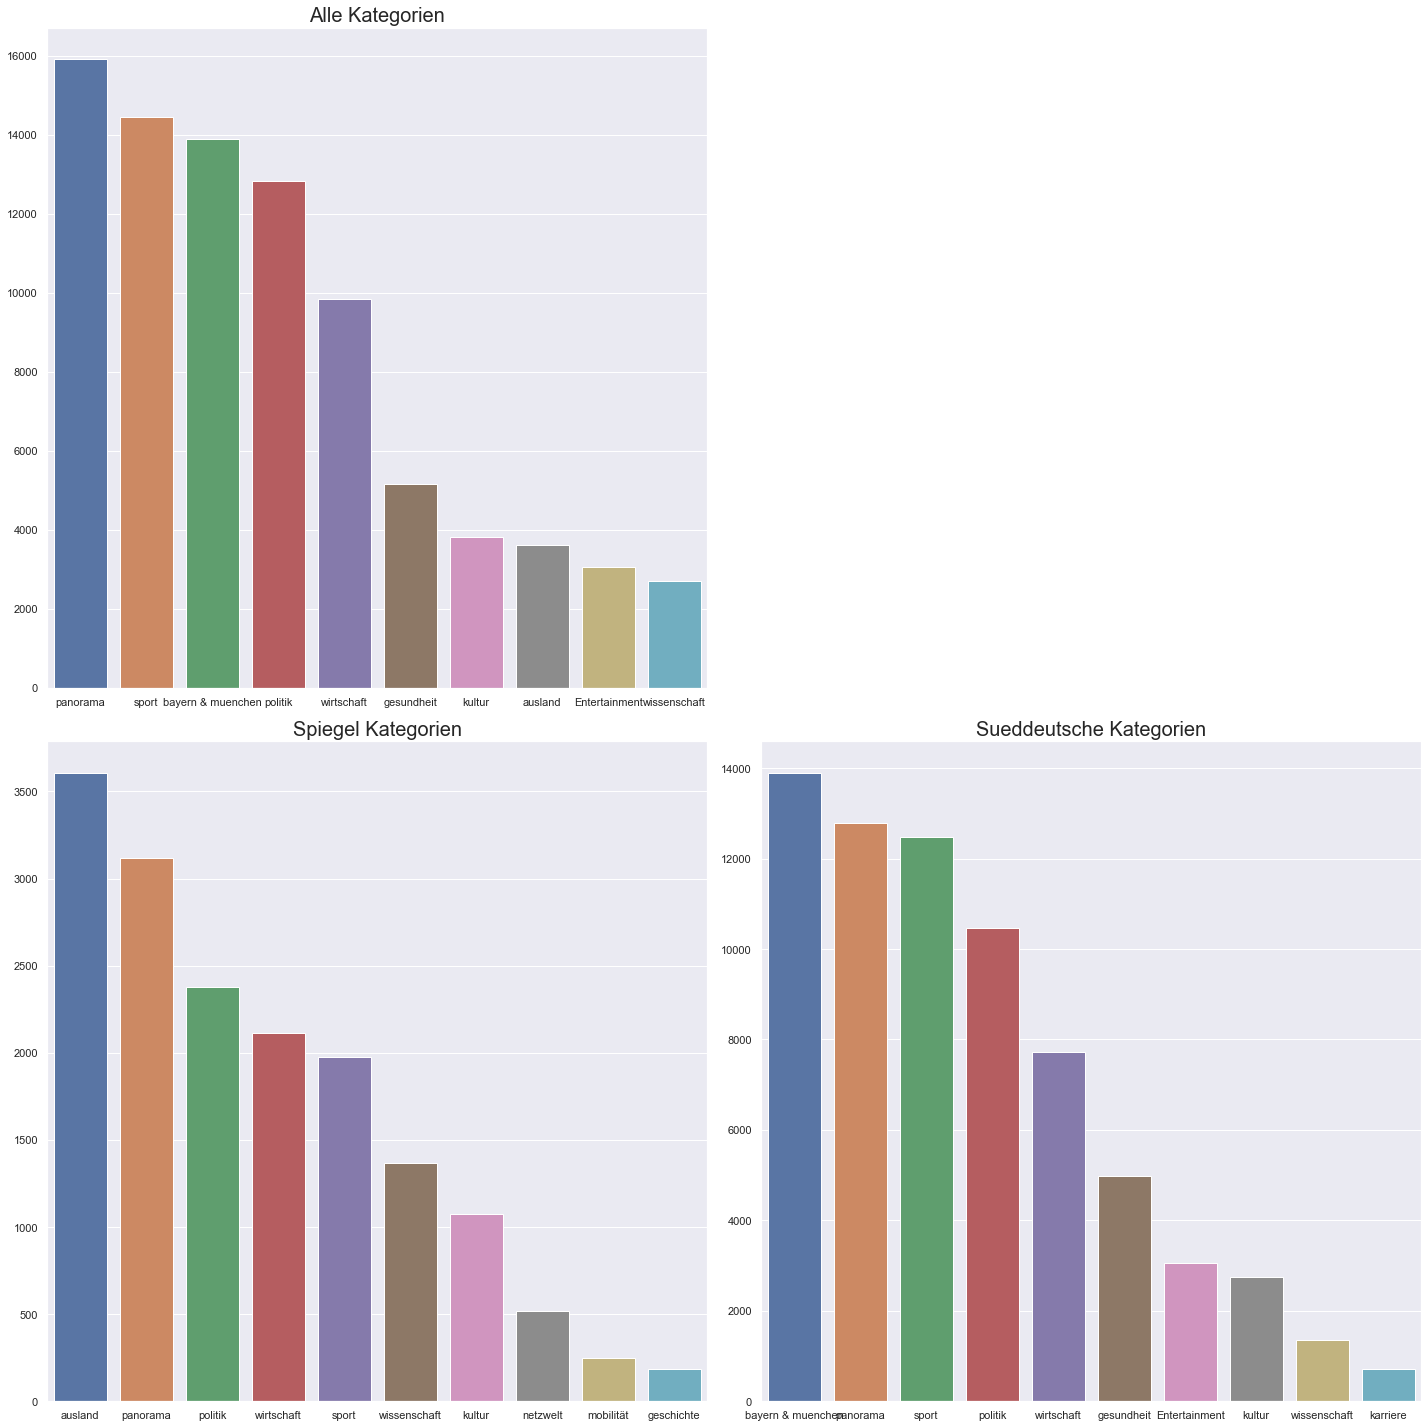

In [18]:
Sueddeutsche_Values = DataFrame.loc[DataFrame["News_page"] == "Sueddeutsche" ]["Kategorie"].value_counts()[:10]

Spiegel_Values = DataFrame.loc[DataFrame["News_page"] == "Spiegel" ]["Kategorie"].value_counts()[:10]

Overall_Values = DataFrame["Kategorie"].value_counts()[:10]


# define size
sns.set(rc={'figure.figsize':(20,20)})

font_dict = {
        'size': 20,
        }

# plot 1
# declaring data
values = Overall_Values.values
keys = Overall_Values.keys()

plt.subplot(2, 2, 1)

plt.title("Alle Kategorien",fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)


# plot 2
# declaring data
values = Spiegel_Values.values
keys = Spiegel_Values.keys()

plt.subplot(2, 2, 3)

plt.title("Spiegel Kategorien", fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)

# plot 3
# declaring data
values = Sueddeutsche_Values.values
keys = Sueddeutsche_Values.keys()

plt.subplot(2, 2, 4)

plt.title("Sueddeutsche Kategorien",fontdict=font_dict)

# plotting data on chart
sns.barplot(x = keys,y=values)

# displaying chart
plt.tight_layout()  

# save fig    
plt.savefig("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/Kategorien_Verteilung_BarChart.png")





# Categories - Piechart

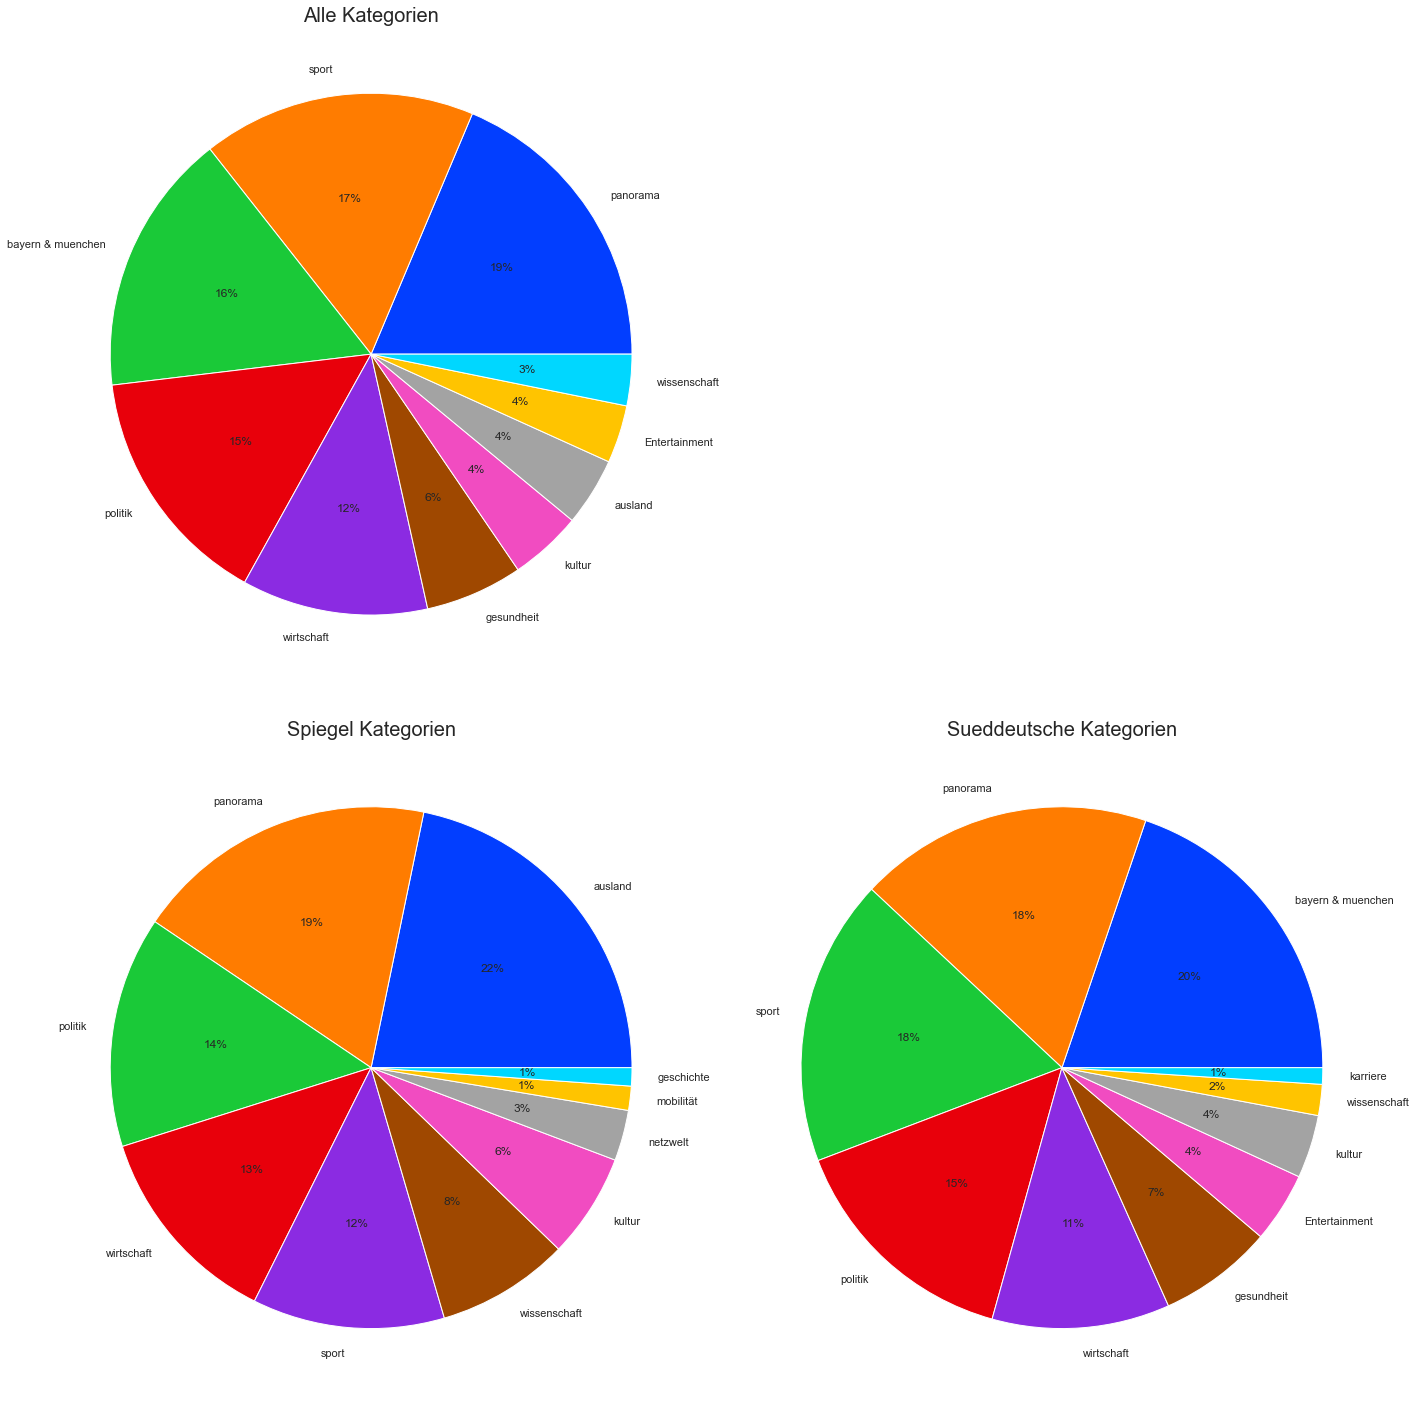

In [19]:
Sueddeutsche_Values = DataFrame.loc[DataFrame["News_page"] == "Sueddeutsche" ]["Kategorie"].value_counts()[:10]

Spiegel_Values = DataFrame.loc[DataFrame["News_page"] == "Spiegel" ]["Kategorie"].value_counts()[:10]

Overall_Values = DataFrame["Kategorie"].value_counts()[:10]


# define Seaborn color palette to use
palette_color = sns.color_palette('bright')



font_dict = {
        'size': 20,
        }


radius = 1

# plot 1
# declaring data
values = Overall_Values.values
keys = Overall_Values.keys()

plt.subplot(2, 2, 1)

plt.title("Alle Kategorien",fontdict=font_dict)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%',radius = radius)


# plot 2
# declaring data
values = Spiegel_Values.values
keys = Spiegel_Values.keys()

plt.subplot(2, 2, 3)

plt.title("Spiegel Kategorien", fontdict=font_dict)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%',radius = radius)


# plot 3
# declaring data
values = Sueddeutsche_Values.values
keys = Sueddeutsche_Values.keys()

plt.subplot(2, 2, 4)

plt.title("Sueddeutsche Kategorien",fontdict=font_dict)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%',radius = radius)
    
# displaying chart
plt.tight_layout()  

# save fig    
plt.savefig("/Users/jan/Documents/Python_Projects/Bachelorthesis/Analysis/Plots/Kategorien/Kategorien_Verteilung_PieChart.png")





# Helper

In [87]:
def set_correct_datatypes(dataframe):
    try:
        dataframe["Zugriff_Datum"] = pd.to_datetime(dataframe["Zugriff_Datum"], format='%Y-%m-%d')
    except:
        pass
    try: 
        dataframe["Date_Info"] = pd.to_datetime(dataframe["Date_Info"], format='%Y-%m-%d')
    except:
        pass
    try: 
        dataframe["date"] = pd.to_datetime(dataframe["date"], format='%Y-%m-%d')
    except:
        pass
    return dataframe

def smoothen_timeseries(dataframe):
    df = dataframe.copy()
    window_size = 7
    
    Column_names = 
    
    for column_name in Column_names:
        # smoothing Occurence 
        
        data = df[column_name].rolling(window_size).sum()
        dataframe["smoothened_"+column_name] = data
    return dataframe